**Key Steps for Frontier ECG Preprocessing and R-R Interval Extraction for a Single Athlete**

1. **Load and Concatenate ECG Data**:  
   Reads and combines multiple ECG files for the athlete into a single DataFrame, creating a continuous dataset.

2. **Data Cleaning and Conversion**:  
   Converts data values from strings to integers for consistency and removes unnecessary index columns.

3. **Peak Detection and Filtering**:  
   Identifies significant R-peaks, filters the top 1.5% of values to retain only the major peaks, and calculates R-R intervals between successive peaks.

4. **Interval Analysis and Visualization**:  
   Plots the ECG data and R-R interval distribution to inspect heart rate variability, filtering intervals to remove outliers within a specific range.

5. **Save Final R-R Intervals**:  
   Saves the processed R-R intervals to a CSV file, creating a ready-to-use dataset for analyzing the athlete's heart rate variability.


In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

In [7]:
filepath = '/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/Sub36/'

In [9]:
# Create concatenated data
df_concat = pd.DataFrame()                            #create empty dataframe
for i in range (0,19):                               #go through each file
  filename = ('ecg_'+'%d'+'.csv') %i                  #get file name
  df = pd.read_csv(filepath + filename, header=None)  #read file (ignore header)
  df = df[1:]                                         #delete the header
  df_concat = pd.concat([df_concat, df])              #add data to end of list
df_concat

,0
1,32
2,15
3,0
4,-17
5,-33
...,...
2496,76
2497,66
2498,-4
2499,-44


In [10]:
df_concat = df_concat.reset_index()               #updates to the correct indexes
df_concat = df_concat.drop(['index'], axis =1)    #drops 'index' column

# Converts string values to integers
real = []
for i in df_concat[0]:
  real.append(int(i))
df_concat[0] = real

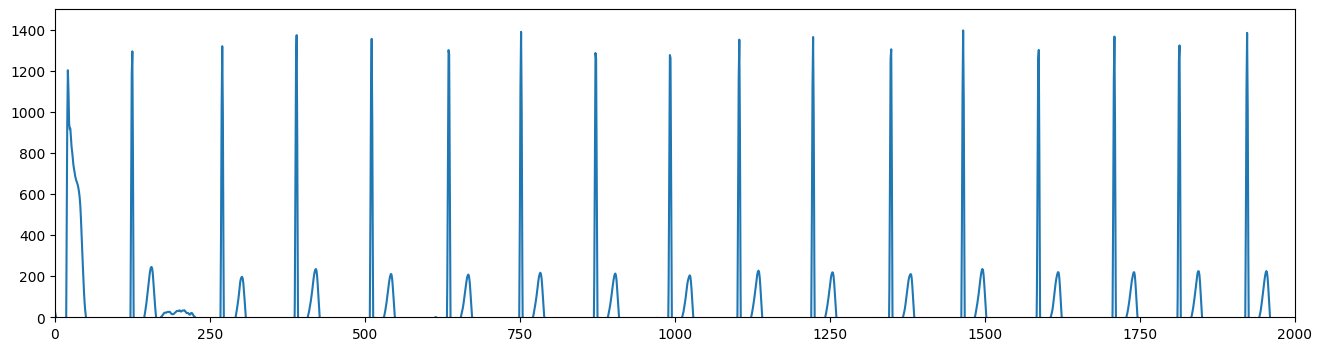

In [11]:
# plot data and set X limits
plt.plot(df_concat[0])
plt.xlim(00, 2000)
plt.ylim(0,1500)
# Set graph dimentions in inches
plt.gcf().set_size_inches(16, 4)

In [16]:
df_ecg = df_concat.to_csv( 'Concussion_Sample1.csv', index=False)

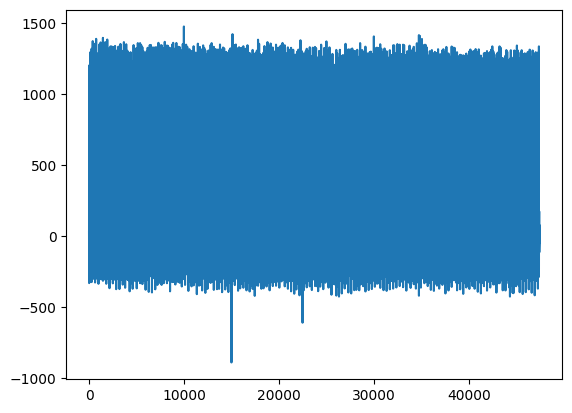

In [14]:
plt.plot(df_concat[0])

In [20]:
filepath = '/content/Concussion_Sample1.csv'
df_ecg = pd.read_csv(filepath, header=None)
df_ecg

,0
0,0
1,32
2,15
3,0
4,-17
...,...
47496,76
47497,66
47498,-4
47499,-44


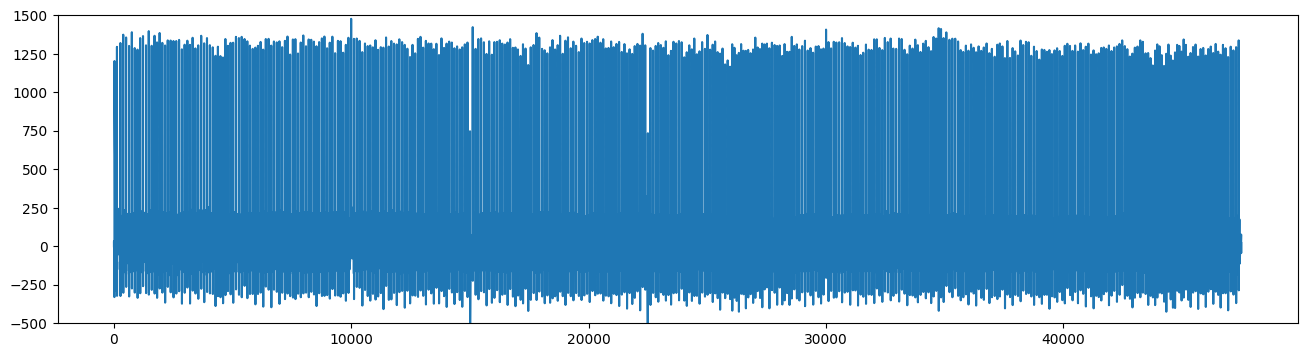

In [21]:
plt.plot(df_ecg[0])
#plt.xlim(15000, 20000)
plt.ylim(-500, 1500)
plt.gcf().set_size_inches(16, 4)

In [22]:
# Create an array of values
arr = df_ecg[0]
# Create a dictionary with "time" and "value" columns
data = {"time": range(len(arr)), "signal": arr}

# Create a DataFrame from the dictionary
df = pd.DataFrame(data)
df.loc[:, "time"] = df.loc[:, "time"] / 125 * 1000
df

<ipython-input-22-26254810fbfe>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.00000e+00 8.00000e+00 1.60000e+01 ... 3.79984e+05 3.79992e+05
 3.80000e+05]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[:, "time"] = df.loc[:, "time"] / 125 * 1000


,time,signal
0,0.0,0
1,8.0,32
2,16.0,15
3,24.0,0
4,32.0,-17
...,...,...
47496,379968.0,76
47497,379976.0,66
47498,379984.0,-4
47499,379992.0,-44


In [23]:
df_x_y = df[df["signal"] < 1600]
df_y_sorted = df_x_y.sort_values(by='signal')
df_y_subset = df_y_sorted[int(df_y_sorted.shape[0] - 0.015*df_y_sorted.shape[0]):]
df_y_subset_sort = pd.DataFrame.sort_index(df_y_subset)
df_y_subset_index = df_y_subset_sort.reset_index()
df_y_subset_index

,index,time,signal
0,22,176.0,1203
1,125,1000.0,1182
2,126,1008.0,1295
3,271,2168.0,1320
4,390,3120.0,1244
...,...,...,...
708,47057,376456.0,1223
709,47171,377368.0,1272
710,47172,377376.0,1190
711,47283,378264.0,1293


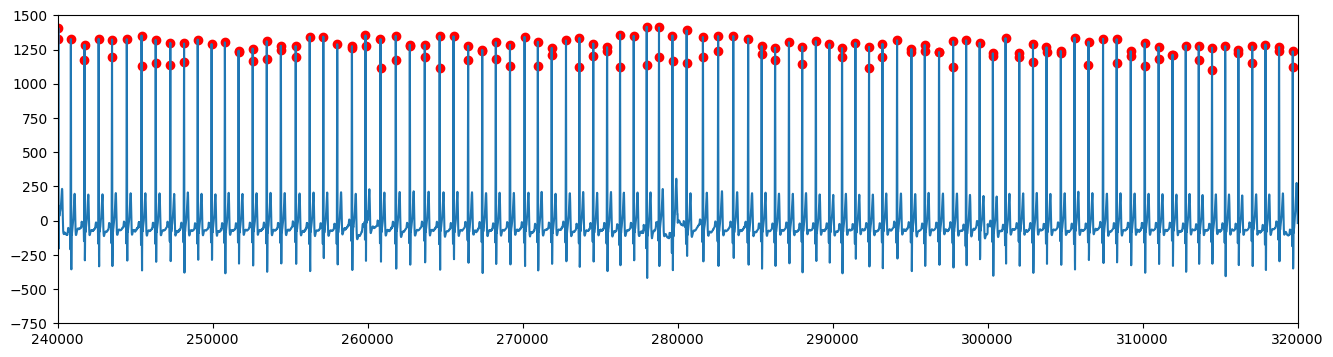

In [26]:
# Plotting the original data with time conversion
plt.plot(df.loc[:, "time"], df_ecg[0])  # Make sure to replace 'df_ecg[0]' with your actual signal values
plt.xlim(df.loc[30000, "time"], df.loc[40000, "time"])  # Set x limits using the converted time values
plt.ylim(-750, 1500)
plt.gcf().set_size_inches(16, 4)

# Overlaying the subset of data points in red
plt.scatter(df_y_subset_index['time'], df_y_subset_index['signal'], color='red')

plt.show()  # This will display the plot with the overlay


In [27]:
rr_int = []
for i in range(df_y_subset_index.shape[0]-1):
  interval = df_y_subset_index.time[i+1] - df_y_subset_index.time[i]
  rr_int.append(interval)
len(rr_int)

712

Text(0.5, 1.0, 'distribution of interval values')

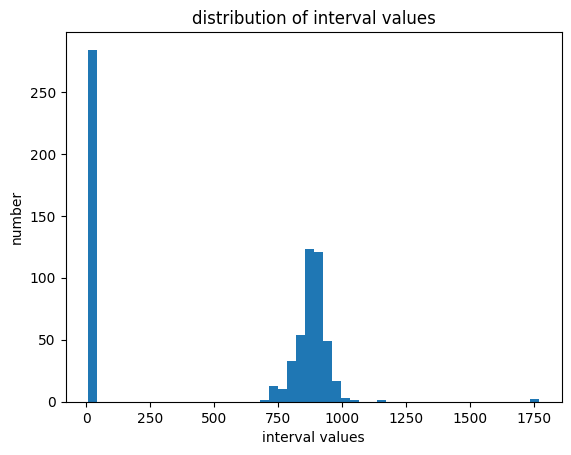

In [28]:
rr_int = np.array(rr_int)
plt.hist(rr_int, bins=50)
plt.xlabel("interval values")
plt.ylabel("number")
#plt.xlim(200, 1500)
#plt.ylim(0, 300)
plt.title("distribution of interval values")

In [29]:
rr_int_temp = rr_int[np.where(rr_int < 1600)]
rr_int_real = rr_int_temp[np.where(rr_int_temp >= 400)]
mask = rr_int_real <= 2000
rr_int_real = rr_int_real[mask]
rr_int_real.shape

(426,)

(426,)

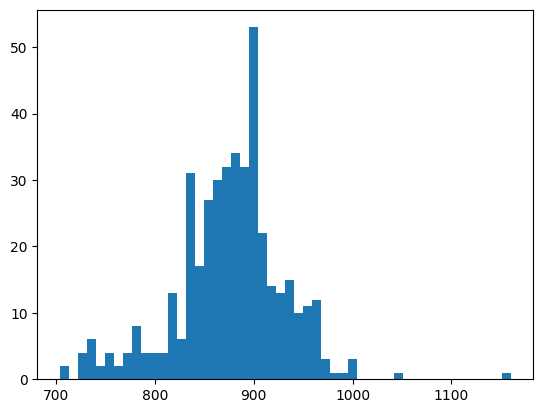

In [30]:
plt.hist(rr_int_real, bins=50)
rr_int_real.shape

(426,)

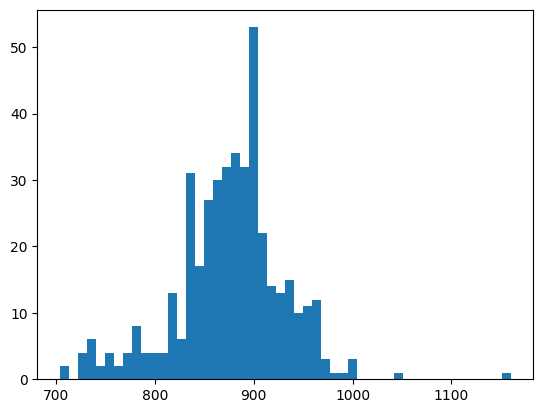

In [31]:
rr_end = rr_int_real[-450:]
plt.hist(rr_end, bins=50)
rr_end.shape

In [32]:
name = ("/content/drive/MyDrive/NeuroBeat_GitHub_Repo/Data/Unprocessed/FrontierX2/Sub36/Try1.csv")
with open(name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['R-R Interval (Samples)'])
    for interval in rr_int_real:
        writer.writerow([interval])